### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Import dataset Kerja tahun 2021 menurut kabupaten/kota

In [2]:
dataset = pd.read_excel('D:/PENS/Semester 3/Analisa Statistika Terapan/Kerja2021_Kabupaten_Kota.xlsx')
dataset

,Provinsi,Kab/Kota,Penduduk_Miskin,Lama_Sekolah,IPM,TPT,TPAK,PDRB
0,ACEH,Simeulue,18.98,9.48,66.41,5.714106,71.153186,1.648096e+06
1,ACEH,Aceh Singkil,20.36,8.68,69.22,8.363735,62.854266,1.780419e+06
2,ACEH,Aceh Selatan,13.18,8.88,67.44,6.457665,60.848168,4.345784e+06
3,ACEH,Aceh Tenggara,13.41,9.67,69.44,6.429772,69.622685,3.487157e+06
4,ACEH,Aceh Timur,14.45,8.21,67.83,7.133678,59.479165,8.433526e+06
...,...,...,...,...,...,...,...,...
509,PAPUA,Puncak,36.26,2.16,43.17,0.942310,89.427373,8.310700e+05
510,PAPUA,Dogiyai,28.81,4.94,55.00,5.679180,78.199949,9.069035e+05
511,PAPUA,Intan Jaya,41.66,3.09,48.34,1.431981,75.746047,7.671010e+05
512,PAPUA,Deiyai,40.59,3.25,49.96,0.790817,85.009032,8.412955e+05


#### Keterangan nama atribut:
1. Provinsi : Letak provinsi dari Kabupaten/Kota
2. Penduduk_Miskin : Presentase penduduk miskin (P0)
3. Lama_Sekolah : Rata-rata lama sekolah penduduk berusia 15 tahun keatas
4. IPM : Indeks Pembangunan Manusia
5. TPT : Tingkat Pengangguran Terbuka
6. TPAK : Tingkat partisipasi Angkatan Kerja
7. Upah_Jam : Rata-rata upah minimum per jam (rupiah/jam)
8. UMP : Upah mimimum provinsi (rupiah)

### Menampilkan informasi dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Provinsi         514 non-null    object 
 1   Kab/Kota         514 non-null    object 
 2   Penduduk_Miskin  514 non-null    float64
 3   Lama_Sekolah     514 non-null    float64
 4   IPM              514 non-null    float64
 5   TPT              514 non-null    float64
 6   TPAK             514 non-null    float64
 7   PDRB             514 non-null    float64
dtypes: float64(6), object(2)
memory usage: 32.2+ KB


### Cek missing value dataset

In [4]:
missing_data = pd.DataFrame({'total_missing_value': dataset.isnull().sum()})
missing_data

,total_missing_value
Provinsi,0
Kab/Kota,0
Penduduk_Miskin,0
Lama_Sekolah,0
IPM,0
TPT,0
TPAK,0
PDRB,0


### Exploratory Data Analysis (EDA)

#### Mendefinisikan atribut numeric

In [5]:
# numerik
numeric = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric

['Penduduk_Miskin', 'Lama_Sekolah', 'IPM', 'TPT', 'TPAK', 'PDRB']

#### Menampilkan ringkasan statistik

In [6]:
dataset.describe()

,Penduduk_Miskin,Lama_Sekolah,IPM,TPT,TPAK,PDRB
count,514.000000,514.000000,514.000000,514.000000,514.000000,5.140000e+02
mean,12.273152,8.436615,69.926770,5.059394,69.464606,2.196408e+07
std,7.458703,1.630842,6.497033,2.637003,6.396602,4.790492e+07
min,2.380000,1.420000,32.840000,0.000000,56.392962,1.474851e+05
25%,7.150000,7.510000,66.642500,3.182344,65.067287,3.654291e+06
50%,10.455000,8.305000,69.610000,4.561021,68.953262,8.814926e+06
75%,14.887500,9.337500,73.112500,6.527139,72.343011,1.973510e+07
max,41.660000,12.830000,87.180000,13.373057,97.933923,4.600810e+08


#### Plot distribusi data atribut dengan tipe numerik

C:\Users\winar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\winar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\winar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

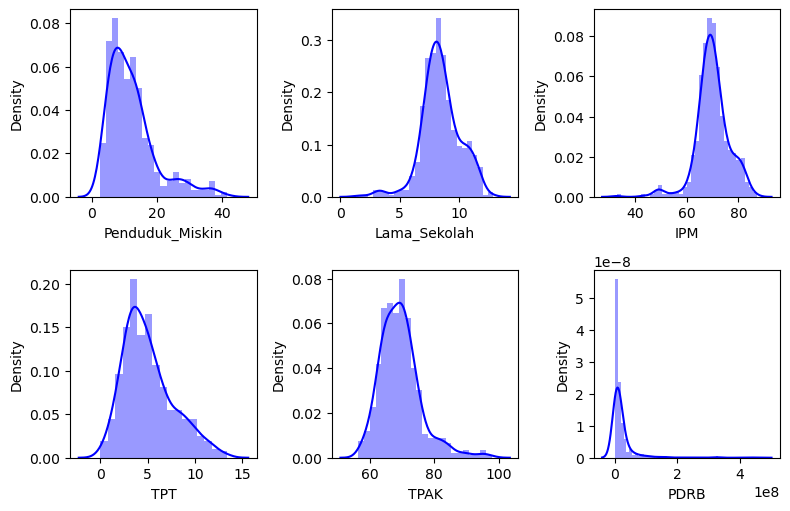

In [7]:
# density plot
plt.figure(figsize = (8, 10))
for i in range(0, len(numeric)):
    plt.subplot(4, 3, i+1)
    sns.distplot(dataset[numeric[i]], color = 'blue')
    plt.tight_layout()

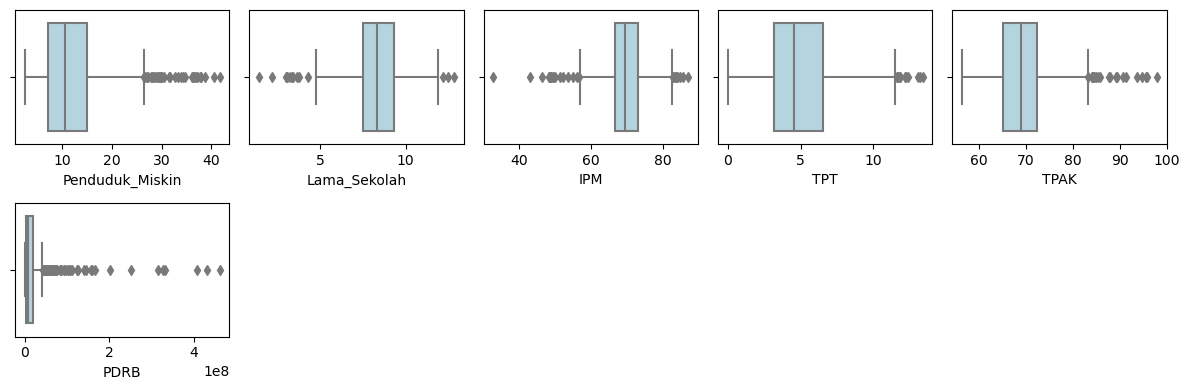

In [8]:
# boxplot
plt.figure(figsize = (12, 4))
for i in range(0, len(numeric)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x = dataset[numeric[i]], color = 'lightblue')
    plt.tight_layout()

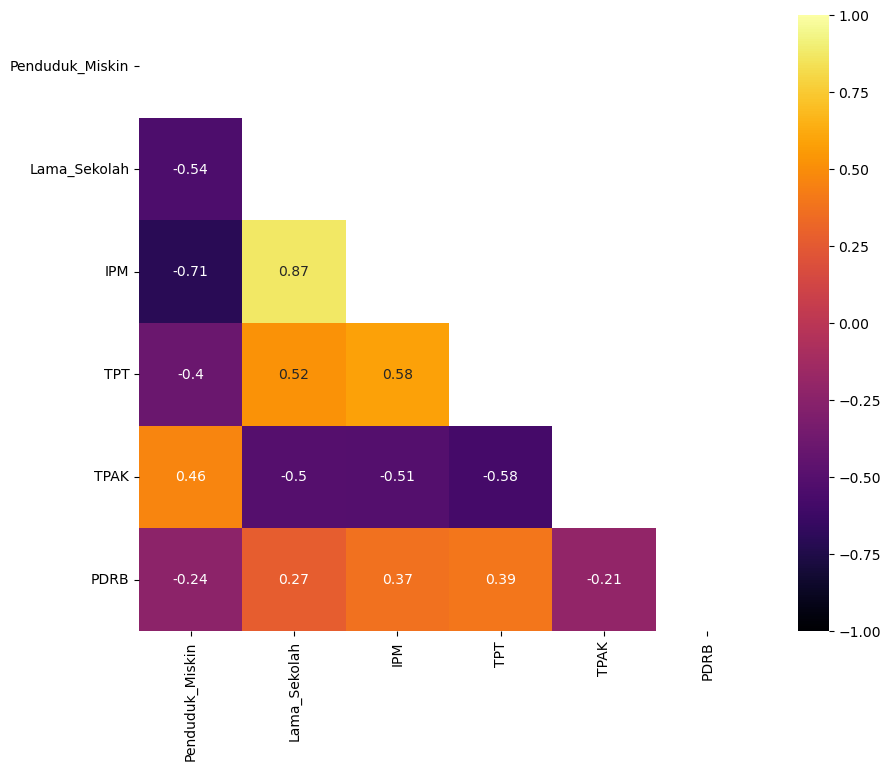

In [9]:
# heatmap
plt.figure(figsize = (10, 8))
mask = np.triu(np.ones_like(dataset[numeric].corr(), dtype = bool))
correlation_plot = sns.heatmap(dataset[numeric].corr(), annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'inferno', mask = mask)

In [10]:
# bar plot 10 kabupaten/kota dengan tingkat pengangguran terbuka tertinggi
tpt_prov = pd.DataFrame(dataset[["Kab/Kota", "TPT"]])
tpt_prov["TPT"] = round(tpt_prov["TPT"], 4)
tpt_prov10 = tpt_prov.sort_values(by = "TPT", ascending = False).head(10)
tpt_prov10

,Kab/Kota,TPT
68,Kota Padang,13.3731
419,Kota Makassar,13.1760
184,Kota Cimahi,13.0685
326,Kota Pontianak,12.3757
160,Bogor,12.2239
381,Kota Manado,12.1740
174,Karawang,11.8336
178,Kota Bogor,11.7878
167,Kuningan,11.6763
513,Kota Jayapura,11.6706


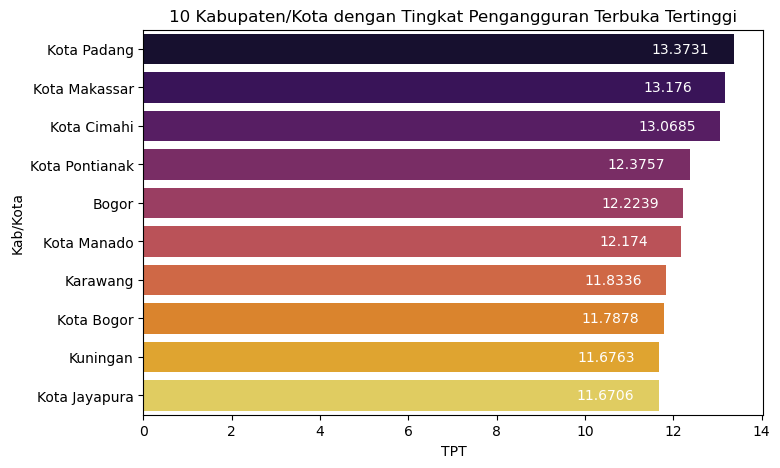

In [11]:
fig,ax = plt.subplots(figsize = (8, 5))
ax = sns.barplot(palette = "inferno", ax = ax, x = "TPT", y = "Kab/Kota", data = tpt_prov10)
plt.title('10 Kabupaten/Kota dengan Tingkat Pengangguran Terbuka Tertinggi', fontsize = 12)
      
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -59
    ha = 'left'
    
    if x_value < 0:
        space *= -1
        ha = 'right'
        
    label = '{:}'.format(x_value)

   
    plt.annotate(label, (x_value, y_value), xytext = (space, 0), textcoords = 'offset points', va = 'center', ha = ha, color = 'white')           

In [12]:
# bar plot 10 kabupaten/kota dengan tingkat partisipasi angkatan kerja tertinggi
tpak_prov=pd.DataFrame(dataset[["Kab/Kota","TPAK"]])
tpak_prov["TPAK"]=round(tpak_prov["TPAK"],4)
tpak_prov10=tpak_prov.sort_values(by="TPAK", ascending=False).head(10)
tpak_prov10

,Kab/Kota,TPAK
505,Nduga *,97.9339
507,Mamberamo Tengah,95.8363
506,Lanny Jaya,95.6585
483,Pegunungan Arfak,94.7132
508,Yalimo,93.6847
492,Puncak Jaya,91.3949
499,Tolikara,90.6142
509,Puncak,89.4274
491,Paniai,89.2562
498,Pegunungan Bintang,87.8800


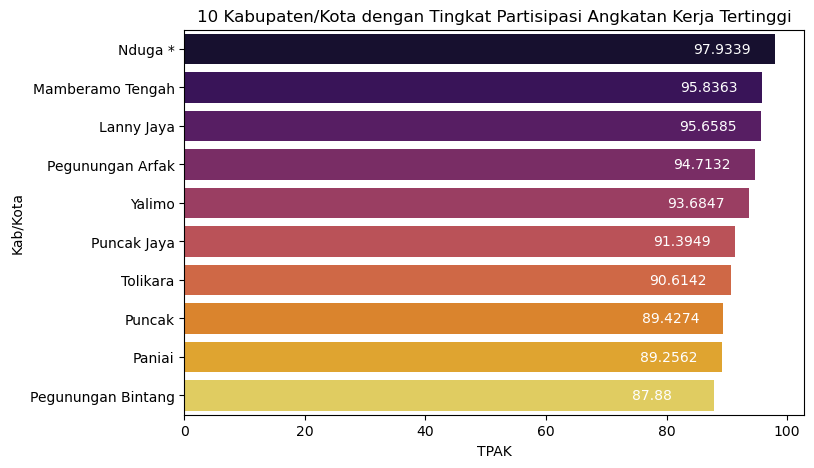

In [13]:
fig,ax = plt.subplots(figsize = (8, 5))
ax = sns.barplot(palette = "inferno", ax = ax, x = "TPAK", y = "Kab/Kota", data = tpak_prov10)
plt.title('10 Kabupaten/Kota dengan Tingkat Partisipasi Angkatan Kerja Tertinggi', fontsize = 12)
      
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -59
    ha = 'left'
    
    if x_value < 0:
        space *= -1
        ha = 'right'
        
    label = '{:}'.format(x_value)

   
    plt.annotate(label, (x_value, y_value), xytext = (space, 0), textcoords = 'offset points', va = 'center', ha = ha, color = 'white')           

### Clustering
Clustering tantangan kerja di Indonesia per-Kabupaten/Kota berdasarkan Tingkat Pengangguran Terbuka (TPT) dan Tingkat Partisipasi Angkatan Kerja (TPAK)

#### Penentuan nilai K optimal dengan Grafik Elbow

C:\Users\winar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


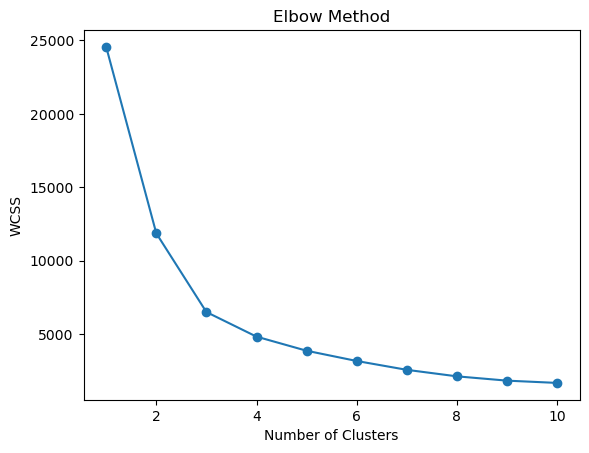

In [14]:
wcss = []
klast_data = dataset[['TPT', 'TPAK']]

num_clusters_range = range(1, 11)

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = 10)
    kmeans.fit(klast_data)
    wcss.append(kmeans.inertia_)

plt.plot(num_clusters_range, wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Dari hasil grafik elbow di atas, maka klaster ditentukan sebanyak 3 klaster dengan pertimbangan pada cluster setelah 3 terdapat penurunan inersia yang melambat signifikan dan membentuk pola seperti siku

#### Penentuan nilai K optimal dengan Silhouette Score

In [15]:
wcss = []
silhouette_scores = []
k_values = range(2, 11)

klast_data = dataset[['TPT', 'TPAK']]

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(klast_data)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(klast_data)
    silhouette_scores.append(silhouette_score(klast_data, labels))

best_k = k_values[np.argmax(silhouette_scores)]

# Print the results
print("---------------------------------------")
print("Silhouette scores:", silhouette_scores)
print("Best K:", best_k)

---------------------------------------
Silhouette scores: [0.4602433012609903, 0.46684276203665853, 0.39092646120272956, 0.3854248776061563, 0.3740903011322257, 0.3945671489647881, 0.3953745890372485, 0.3956340543238582, 0.3699455134455367]
Best K: 3


In [16]:
s_scores = pd.DataFrame({"K": k_values, "Silhouette Scores": silhouette_scores})
s_scores.sort_values("Silhouette Scores", ascending = False)

,K,Silhouette Scores
1,3,0.466843
0,2,0.460243
7,9,0.395634
6,8,0.395375
5,7,0.394567
2,4,0.390926
3,5,0.385425
4,6,0.374090
8,10,0.369946


Dari Silhouette scores K optimal (Best K) tertinggi menunjukkan angka 3, yakni berarti akan dibuat dengan nilai k untuk k-Means adalah 3. Sesuai dengan Grafik Elbow sebelumnya

#### Pembentukan 3 klaster tantangan kerja

In [17]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(klast_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### Tambahkan kolom label untuk klaster

In [18]:
klast_data["Klaster"] = labels
klast_data.insert(0, 'Provinsi', dataset['Provinsi'])
klast_data.insert(1, 'Kab/Kota', dataset['Kab/Kota'])
klast_data

C:\Users\winar\AppData\Local\Temp\ipykernel_16908\809958822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klast_data["Klaster"] = labels


,Provinsi,Kab/Kota,TPT,TPAK,Klaster
0,ACEH,Simeulue,5.714106,71.153186,2
1,ACEH,Aceh Singkil,8.363735,62.854266,1
2,ACEH,Aceh Selatan,6.457665,60.848168,1
3,ACEH,Aceh Tenggara,6.429772,69.622685,2
4,ACEH,Aceh Timur,7.133678,59.479165,1
...,...,...,...,...,...
509,PAPUA,Puncak,0.942310,89.427373,0
510,PAPUA,Dogiyai,5.679180,78.199949,2
511,PAPUA,Intan Jaya,1.431981,75.746047,2
512,PAPUA,Deiyai,0.790817,85.009032,0


#### Formating data (mengurutkan label klaster)

In [19]:
klast_data.groupby('Klaster').agg('mean')

,TPT,TPAK
Klaster,,
0,1.997664,84.553427
1,6.762362,64.299949
2,4.017612,71.633231


In [20]:
klast_data['Klaster'] = klast_data['Klaster'].replace({0: 'Rendah', 1: 'Tinggi', 2: 'Sedang'})
labels = klast_data["Klaster"]

C:\Users\winar\AppData\Local\Temp\ipykernel_16908\2030460746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klast_data['Klaster'] = klast_data['Klaster'].replace({0: 'Rendah', 1: 'Tinggi', 2: 'Sedang'})


#### Tampilan karakeristik 

In [21]:
klast_data.groupby('Klaster').agg('mean')

,TPT,TPAK
Klaster,,
Rendah,1.997664,84.553427
Sedang,4.017612,71.633231
Tinggi,6.762362,64.299949


Interpretasi:
1. Tantangan Kerja Rendah (Klaster 0) dengan Tingkat Pengangguran Terbuka (TPT) Terendah dan Tingkat Partisipasi Angkatan Kerja (TPAK) tertinggi
2. Tantangan Kerja Sedang (Klaster 2) dengan Tingkat Pengangguran Terbuka (TPT) Sedang dan Tingkat Partisipasi Angkatan Kerja (TPAK) juga sedang
3. Tantangan Kerja Tinggi (Klaster 1) dengan Tingkat Pengangguran Terbuka (TPT) Tertinggi dan Tingkat Partisipasi Angkatan Kerja (TPAK) terendah

#### Persebaran klaster dengan dihitung jumlah kabupaten/kota yang masuk dalam klaster tersebut

In [22]:
klast_data.Klaster.value_counts()

Sedang    246
Tinggi    226
Rendah     42
Name: Klaster, dtype: int64

Penjelasan:
1. Terdapat 226 Kab/Kota yang masuk Tantangan Kerja Tinggi
2. Terdapat 246 Kab/Kota yang masuk Tantangan Kerja Sedang
3. Terdapat 42 Kab/Kota yang masuk Tantangan Kerja Rendah

### Exploratory Data Analysis (EDA) Klaster

In [23]:
cluster_dataset = dataset.copy()
cluster_dataset["Klaster"] = labels
cluster_dataset

,Provinsi,Kab/Kota,Penduduk_Miskin,Lama_Sekolah,IPM,TPT,TPAK,PDRB,Klaster
0,ACEH,Simeulue,18.98,9.48,66.41,5.714106,71.153186,1.648096e+06,Sedang
1,ACEH,Aceh Singkil,20.36,8.68,69.22,8.363735,62.854266,1.780419e+06,Tinggi
2,ACEH,Aceh Selatan,13.18,8.88,67.44,6.457665,60.848168,4.345784e+06,Tinggi
3,ACEH,Aceh Tenggara,13.41,9.67,69.44,6.429772,69.622685,3.487157e+06,Sedang
4,ACEH,Aceh Timur,14.45,8.21,67.83,7.133678,59.479165,8.433526e+06,Tinggi
...,...,...,...,...,...,...,...,...,...
509,PAPUA,Puncak,36.26,2.16,43.17,0.942310,89.427373,8.310700e+05,Rendah
510,PAPUA,Dogiyai,28.81,4.94,55.00,5.679180,78.199949,9.069035e+05,Sedang
511,PAPUA,Intan Jaya,41.66,3.09,48.34,1.431981,75.746047,7.671010e+05,Sedang
512,PAPUA,Deiyai,40.59,3.25,49.96,0.790817,85.009032,8.412955e+05,Rendah


#### Plot distribusi data tiap klaster berdasarkan Tingkat Pengangguran Terbuka (TPT)

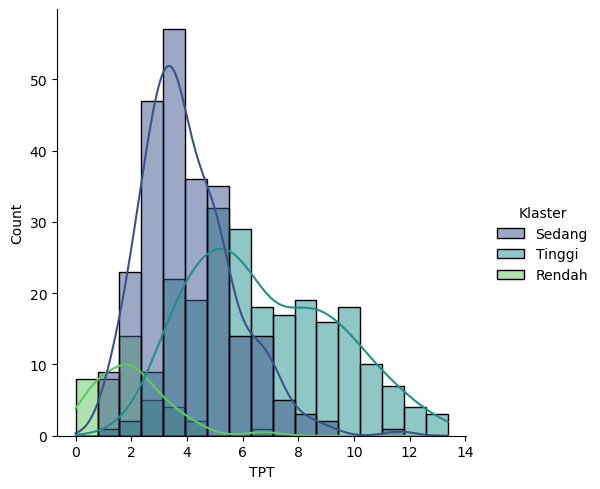

In [24]:
sns.displot(data_klaster, x="TPT", hue="Klaster", kde=True, palette="viridis")

#### Plot distribusi data tiap klaster berdasarkan Tingkat Partisipasi Angkatan Kerja (TPAK)

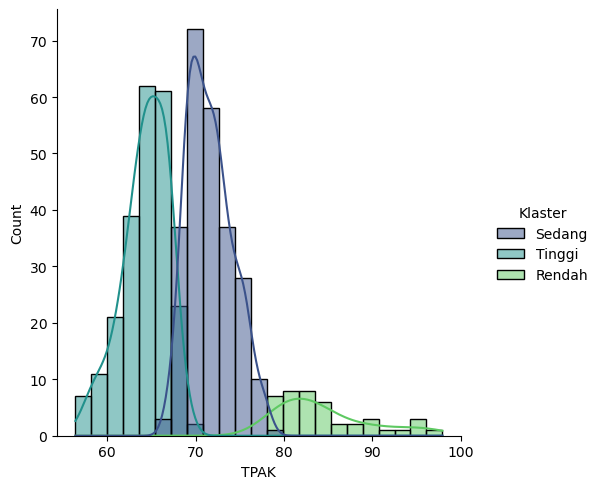

In [25]:
sns.displot(data_klaster, x="TPAK", hue="Klaster", kde=True, palette="viridis")

#### Distribusi klaster Tantangan Kerja

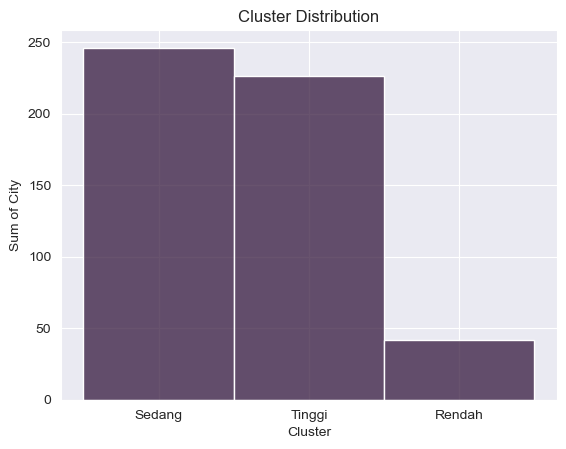

In [32]:
sns.set_style('darkgrid')
sns.set_palette('rocket')

sns.histplot(data=data_klaster, x='Klaster', kde=False, bins=5)

plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Sum of City')

plt.show()

#### Distribusi atribut TPT dan TPAK berdasarkan Klaster

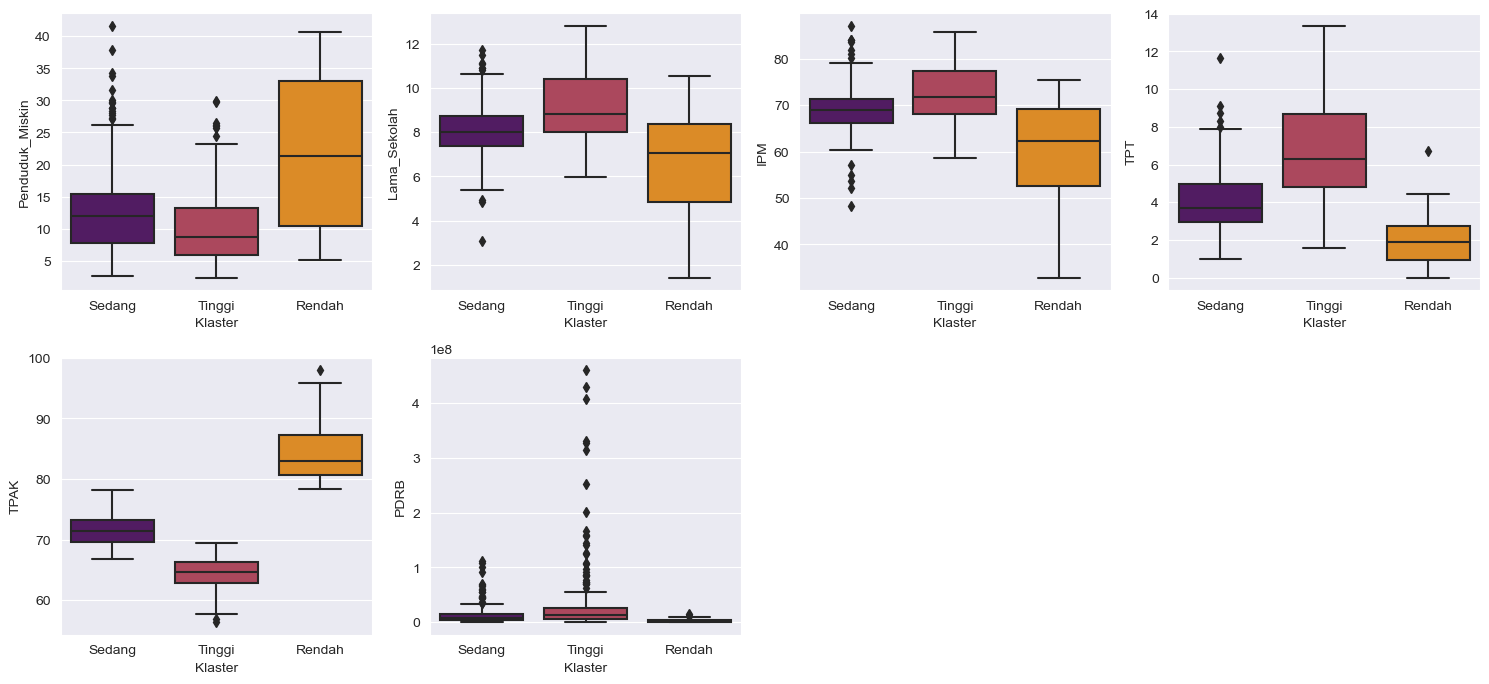

In [33]:
plt.figure(figsize=(15, 10))
for i in range(0, len(numeric)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=data_klaster["Klaster"], y=data_klaster[numeric[i]], palette='inferno')
    plt.tight_layout()

### Simpan Hasil Klaster ke Direktori Lokal

In [ ]:
cluster_dataset.to_excel('D:/PENS/Semester 3/Analisa Statistika Terapan/Hasil_Cluster.xlsx', index = False)